# Model `Hyper` and `HyperPlus`

In [23]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


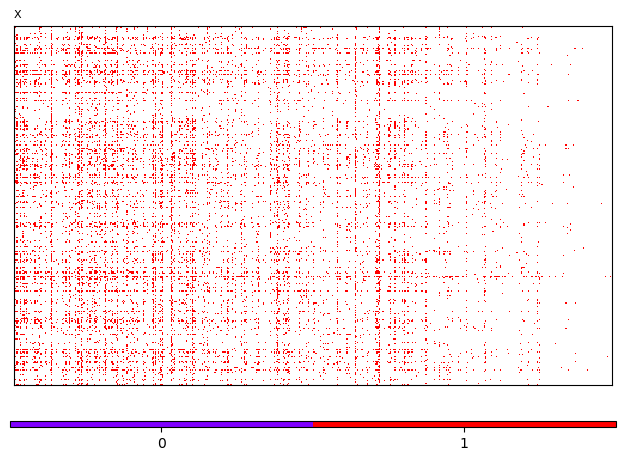

<Figure size 640x480 with 0 Axes>

In [25]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [26]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1721998975
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1721998975


# `Hyper` for exact decomposition

Since `Hyper` is an exact decomposition algorithm, there will be absolutely no coverage on validation and test set.

[I] min_support  : 0.2
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction


d:\MEGA\PyBMF\examples\..\PyBMF\models\Hyper.py:41: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_df = pd.DataFrame.sparse.from_spmatrix(self.X_train.astype(bool))


[I] name         : 2024-07-26 21-02-55-853914 Hyper
[I] Found 496 itemsets, max size: 5


[I] Finding exact decomposition:  62%|██████▏   | 584/936 [00:52<00:31, 11.23it/s]


[I] time elapsed :  1m2s
[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] model saved as: 2024-07-26 21-02-55-853914 Hyper.pickle


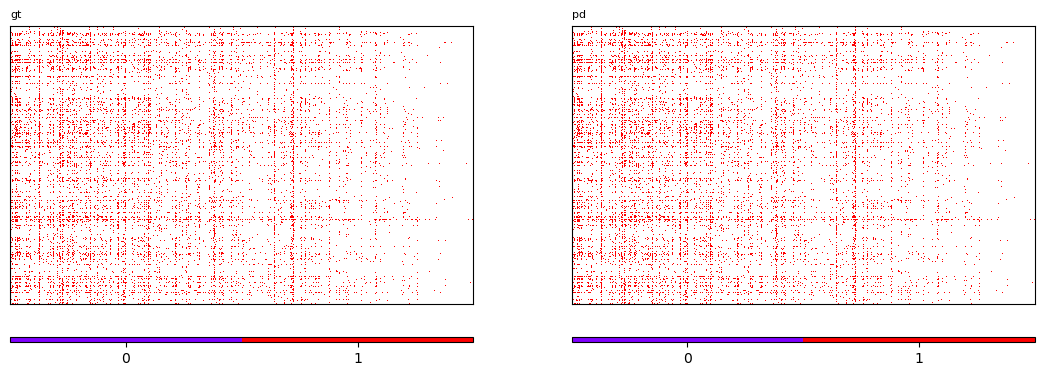

train                      \
                                                  0                       
                  time    k iter    shape    Recall Precision  Accuracy   
0    26/07/24 09:03:06    0    0  [69, 5]  0.032081       1.0  0.930607   
1    26/07/24 09:03:08    1  108  [19, 4]  0.039148       1.0  0.931113   
2    26/07/24 09:03:11    2  105  [65, 3]  0.057281       1.0  0.932413   
3    26/07/24 09:03:12    3   82  [60, 3]  0.074019       1.0  0.933613   
4    26/07/24 09:03:12    4   11  [10, 4]  0.077739       1.0  0.933880   
5    26/07/24 09:03:13    5   50  [62, 3]  0.091966       1.0  0.934900   
6    26/07/24 09:03:14    6    8  [10, 3]  0.094662       1.0  0.935093   
7    26/07/24 09:03:15    7   58  [68, 4]  0.108611       1.0  0.936093   
8    26/07/24 09:03:16    8   40  [61, 3]  0.120420       1.0  0.936940   
9    26/07/24 09:03:19    9  195  [61, 2]  0.131765       1.0  0.937753   
10   26/07/24 09:03:19   10    0  [60, 3]  0.143110       1.0  0.938567   
11   26/07/24 09:03:19   11   11  [49, 2]  0.152222       1.0  0.939220   
12   26/07/24 09:03:19   12    6  [25, 2]  0.156872       1.0  0.939553   
13   26/07/24 09:03:20   13    0  [24, 2]  0.161335       1.0  0.939873   
14   26/07/24 09:03:20   14    0  [23, 2]  0.165613       1.0  0.940180   
15   26/07/24 09:03:20   15    2  [21, 2]  0.169518       1.0  0.940460   
16   26/07/24 09:03:20   16    0  [20, 2]  0.173238       1.0  0.940727   
17   26/07/24 09:03:20   17   13   [4, 3]  0.174354       1.0  0.940807   
18   26/07/24 09:03:20   18   52   [6, 3]  0.175656       1.0  0.940900   
19   26/07/24 09:03:21   19   69   [4, 3]  0.176585       1.0  0.940967   
20   26/07/24 09:03:21   20   21  [60, 2]  0.184582       1.0  0.941540   
21   26/07/24 09:03:21   21   35  [31, 3]  0.188953       1.0  0.941853   
22   26/07/24 09:03:22   22   37  [31, 3]  0.193044       1.0  0.942147   
23   26/07/24 09:03:22   23    6  [61, 2]  0.200577       1.0  0.942687   
24   26/07/24 09:03:22   24    5  [25, 2]  0.203924       1.0  0.942927   
25   26/07/24 09:03:22   25    2  [60, 2]  0.211270       1.0  0.943453   
26   26/07/24 09:03:22   26   18  [60, 2]  0.218523       1.0  0.943973   
27   26/07/24 09:03:22   27    6  [23, 2]  0.221685       1.0  0.944200   
28   26/07/24 09:03:23   28   43  [16, 2]  0.223824       1.0  0.944353   
29   26/07/24 09:03:23   29    1   [6, 2]  0.224940       1.0  0.944433   
30   26/07/24 09:03:23   30    0  [25, 3]  0.226148       1.0  0.944520   
31   26/07/24 09:03:23   31   46   [4, 2]  0.226799       1.0  0.944567   
32   26/07/24 09:03:23   32   26   [5, 2]  0.227543       1.0  0.944620   
33   26/07/24 09:03:23   33    9  [19, 3]  0.229868       1.0  0.944787   
34   26/07/24 09:03:24   34   14  [79, 2]  0.238237       1.0  0.945387   
35   26/07/24 09:03:24   35   18  [23, 2]  0.240841       1.0  0.945573   
36   26/07/24 09:03:24   36   10  [10, 2]  0.242142       1.0  0.945667   
37   26/07/24 09:03:24   37    2  [20, 2]  0.244839       1.0  0.945860   
38   26/07/24 09:03:24   38    5   [7, 2]  0.246141       1.0  0.945953   
39   26/07/24 09:03:24   39   34  [15, 2]  0.247815       1.0  0.946073   
40   26/07/24 09:03:24   40    3  [60, 2]  0.253859       1.0  0.946507   
41   26/07/24 09:03:25   41   47  [65, 2]  0.260275       1.0  0.946967   
42   26/07/24 09:03:25   42   24  [69, 2]  0.266970       1.0  0.947447   
43   26/07/24 09:03:25   43    3  [25, 2]  0.269481       1.0  0.947627   
44   26/07/24 09:03:25   44    2   [4, 2]  0.270039       1.0  0.947667   
45   26/07/24 09:03:25   45    6  [61, 2]  0.275897       1.0  0.948087   
46   26/07/24 09:03:25   46    1  [61, 2]  0.281756       1.0  0.948507   
47   26/07/24 09:03:25   47    0  [11, 3]  0.282500       1.0  0.948560   
48   26/07/24 09:03:25   48   29   [5, 2]  0.283150       1.0  0.948607   
49   26/07/24 09:03:25   49    0  [15, 2]  0.284731       1.0  0.948720   
50   26/07/24 09:03:26   50   11  [63, 2]  0.290776       1.0  0.949153

<Figure size 640x480 with 0 Axes>

In [27]:
from PyBMF.models import Hyper

min_support = 0.2

model = Hyper(min_support=min_support)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=False)

# `HyperPlus` for approximate decomposition

[I] model        : <PyBMF.models.Hyper.Hyper object at 0x000001EE5E190340>
[I] beta         : inf
[I] target_k     : 200
[I] samples      : 10
[I] verbose      : False
[I] display      : False
[I] k from model : 585
[I] save_model   : False
[I] task         : reconstruction
[I] display      : True
[I]   save_model : False


[I] Sampling pairs... Current FP budget: 1.611: 100%|██████████| 199/199 [00:00<00:00, 101417.56it/s]


[I] time elapsed :  2m54s


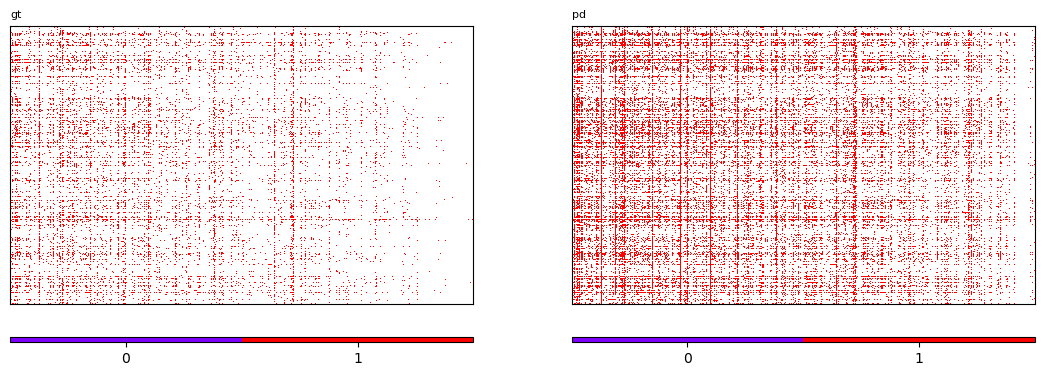

train                      \
                                                  0                       
                  time    k iter    shape    Recall Precision  Accuracy   
0    26/07/24 09:03:06    0    0  [69, 5]  0.032081       1.0  0.930607   
1    26/07/24 09:03:08    1  108  [19, 4]  0.039148       1.0  0.931113   
2    26/07/24 09:03:11    2  105  [65, 3]  0.057281       1.0  0.932413   
3    26/07/24 09:03:12    3   82  [60, 3]  0.074019       1.0  0.933613   
4    26/07/24 09:03:12    4   11  [10, 4]  0.077739       1.0  0.933880   
5    26/07/24 09:03:13    5   50  [62, 3]  0.091966       1.0  0.934900   
6    26/07/24 09:03:14    6    8  [10, 3]  0.094662       1.0  0.935093   
7    26/07/24 09:03:15    7   58  [68, 4]  0.108611       1.0  0.936093   
8    26/07/24 09:03:16    8   40  [61, 3]  0.120420       1.0  0.936940   
9    26/07/24 09:03:19    9  195  [61, 2]  0.131765       1.0  0.937753   
10   26/07/24 09:03:19   10    0  [60, 3]  0.143110       1.0  0.938567   
11   26/07/24 09:03:19   11   11  [49, 2]  0.152222       1.0  0.939220   
12   26/07/24 09:03:19   12    6  [25, 2]  0.156872       1.0  0.939553   
13   26/07/24 09:03:20   13    0  [24, 2]  0.161335       1.0  0.939873   
14   26/07/24 09:03:20   14    0  [23, 2]  0.165613       1.0  0.940180   
15   26/07/24 09:03:20   15    2  [21, 2]  0.169518       1.0  0.940460   
16   26/07/24 09:03:20   16    0  [20, 2]  0.173238       1.0  0.940727   
17   26/07/24 09:03:20   17   13   [4, 3]  0.174354       1.0  0.940807   
18   26/07/24 09:03:20   18   52   [6, 3]  0.175656       1.0  0.940900   
19   26/07/24 09:03:21   19   69   [4, 3]  0.176585       1.0  0.940967   
20   26/07/24 09:03:21   20   21  [60, 2]  0.184582       1.0  0.941540   
21   26/07/24 09:03:21   21   35  [31, 3]  0.188953       1.0  0.941853   
22   26/07/24 09:03:22   22   37  [31, 3]  0.193044       1.0  0.942147   
23   26/07/24 09:03:22   23    6  [61, 2]  0.200577       1.0  0.942687   
24   26/07/24 09:03:22   24    5  [25, 2]  0.203924       1.0  0.942927   
25   26/07/24 09:03:22   25    2  [60, 2]  0.211270       1.0  0.943453   
26   26/07/24 09:03:22   26   18  [60, 2]  0.218523       1.0  0.943973   
27   26/07/24 09:03:22   27    6  [23, 2]  0.221685       1.0  0.944200   
28   26/07/24 09:03:23   28   43  [16, 2]  0.223824       1.0  0.944353   
29   26/07/24 09:03:23   29    1   [6, 2]  0.224940       1.0  0.944433   
30   26/07/24 09:03:23   30    0  [25, 3]  0.226148       1.0  0.944520   
31   26/07/24 09:03:23   31   46   [4, 2]  0.226799       1.0  0.944567   
32   26/07/24 09:03:23   32   26   [5, 2]  0.227543       1.0  0.944620   
33   26/07/24 09:03:23   33    9  [19, 3]  0.229868       1.0  0.944787   
34   26/07/24 09:03:24   34   14  [79, 2]  0.238237       1.0  0.945387   
35   26/07/24 09:03:24   35   18  [23, 2]  0.240841       1.0  0.945573   
36   26/07/24 09:03:24   36   10  [10, 2]  0.242142       1.0  0.945667   
37   26/07/24 09:03:24   37    2  [20, 2]  0.244839       1.0  0.945860   
38   26/07/24 09:03:24   38    5   [7, 2]  0.246141       1.0  0.945953   
39   26/07/24 09:03:24   39   34  [15, 2]  0.247815       1.0  0.946073   
40   26/07/24 09:03:24   40    3  [60, 2]  0.253859       1.0  0.946507   
41   26/07/24 09:03:25   41   47  [65, 2]  0.260275       1.0  0.946967   
42   26/07/24 09:03:25   42   24  [69, 2]  0.266970       1.0  0.947447   
43   26/07/24 09:03:25   43    3  [25, 2]  0.269481       1.0  0.947627   
44   26/07/24 09:03:25   44    2   [4, 2]  0.270039       1.0  0.947667   
45   26/07/24 09:03:25   45    6  [61, 2]  0.275897       1.0  0.948087   
46   26/07/24 09:03:25   46    1  [61, 2]  0.281756       1.0  0.948507   
47   26/07/24 09:03:25   47    0  [11, 3]  0.282500       1.0  0.948560   
48   26/07/24 09:03:25   48   29   [5, 2]  0.283150       1.0  0.948607   
49   26/07/24 09:03:25   49    0  [15, 2]  0.284731       1.0  0.948720   
50   26/07/24 09:03:26   50   11  [63, 2]  0.290776       1.0  0.949153

train  \
                                                                       0   
                  time    k savings       FPR       FPB       OCR Recall   
0    26/07/24 09:04:00  584     inf  0.000366  0.004742  0.004720    1.0   
1    26/07/24 09:04:01  583     inf  0.000761  0.009857  0.009761    1.0   
2    26/07/24 09:04:01  582     inf  0.000862  0.011159  0.011035    1.0   
3    26/07/24 09:04:02  581     inf  0.001314  0.017017  0.016732    1.0   
4    26/07/24 09:04:02  580     inf  0.001515  0.019621  0.019243    1.0   
5    26/07/24 09:04:02  579     inf  0.001774  0.022968  0.022453    1.0   
6    26/07/24 09:04:03  578     inf  0.002205  0.028548  0.027755    1.0   
7    26/07/24 09:04:03  577     inf  0.002729  0.035336  0.034130    1.0   
8    26/07/24 09:04:04  576     inf  0.003131  0.040543  0.038963    1.0   
9    26/07/24 09:04:04  575     inf  0.003289  0.042589  0.040849    1.0   
10   26/07/24 09:04:05  574     inf  0.003433  0.044449  0.042557    1.0   
11   26/07/24 09:04:05  573     inf  0.003490  0.045192  0.043238    1.0   
12   26/07/24 09:04:06  572     inf  0.003907  0.050586  0.048150    1.0   
13   26/07/24 09:04:06  571     inf  0.004395  0.056909  0.053845    1.0   
14   26/07/24 09:04:06  570     inf  0.004460  0.057746  0.054593    1.0   
15   26/07/24 09:04:07  569     inf  0.004962  0.064255  0.060376    1.0   
16   26/07/24 09:04:07  568     inf  0.005408  0.070020  0.065438    1.0   
17   26/07/24 09:04:08  567     inf  0.005573  0.072159  0.067303    1.0   
18   26/07/24 09:04:08  566     inf  0.005946  0.076995  0.071490    1.0   
19   26/07/24 09:04:09  565     inf  0.006392  0.082760  0.076434    1.0   
20   26/07/24 09:04:10  564     inf  0.006535  0.084620  0.078018    1.0   
21   26/07/24 09:04:10  563     inf  0.006930  0.089734  0.082345    1.0   
22   26/07/24 09:04:10  562     inf  0.006988  0.090478  0.082971    1.0   
23   26/07/24 09:04:11  561     inf  0.007052  0.091315  0.083674    1.0   
24   26/07/24 09:04:11  560     inf  0.007225  0.093547  0.085544    1.0   
25   26/07/24 09:04:12  559     inf  0.007878  0.102009  0.092566    1.0   
26   26/07/24 09:04:12  558     inf  0.008043  0.104147  0.094324    1.0   
27   26/07/24 09:04:13  557     inf  0.008467  0.109634  0.098802    1.0   
28   26/07/24 09:04:13  556     inf  0.008575  0.111028  0.099933    1.0   
29   26/07/24 09:04:14  555     inf  0.008647  0.111958  0.100686    1.0   
30   26/07/24 09:04:14  554     inf  0.009156  0.118561  0.105994    1.0   
31   26/07/24 09:04:14  553     inf  0.009609  0.124419  0.110652    1.0   
32   26/07/24 09:04:15  552     inf  0.010033  0.129905  0.114970    1.0   
33   26/07/24 09:04:15  551     inf  0.010564  0.136786  0.120327    1.0   
34   26/07/24 09:04:16  550     inf  0.010729  0.138925  0.121979    1.0   
35   26/07/24 09:04:16  549     inf  0.011174  0.144690  0.126401    1.0   
36   26/07/24 09:04:16  548     inf  0.011972  0.155012  0.134208    1.0   
37   26/07/24 09:04:17  547     inf  0.012187  0.157802  0.136294    1.0   
38   26/07/24 09:04:18  546     inf  0.012324  0.159569  0.137610    1.0   
39   26/07/24 09:04:18  545     inf  0.012754  0.165148  0.141740    1.0   
40   26/07/24 09:04:18  544     inf  0.013437  0.173982  0.148198    1.0   
41   26/07/24 09:04:19  543     inf  0.013903  0.180026  0.152561    1.0   
42   26/07/24 09:04:19  542     inf  0.014277  0.184861  0.156019    1.0   
43   26/07/24 09:04:20  541     inf  0.014435  0.186907  0.157474    1.0   
44   26/07/24 09:04:20  540     inf  0.014464  0.187279  0.157738    1.0   
45   26/07/24 09:04:21  539     inf  0.014844  0.192208  0.161220    1.0   
46   26/07/24 09:04:21  538     inf  0.015383  0.199182  0.166098    1.0   
47   26/07/24 09:04:21  537     inf  0.015749  0.203924  0.169383    1.0   
48   26/07/24 09:04:22  536     inf  0.016008  0.207272  0.171686    1.0   
49   26/07/24 09:04:23  535     inf  0.016202  0.209782  0.173405    1.0   
50   26/07/24 09:04:23  534     inf  0.

<Figure size 640x480 with 0 Axes>

In [28]:
from PyBMF.models import HyperPlus
import warnings

import numpy as np
beta = np.inf
samples = 10
target_k = 200

model_plus = HyperPlus(model=model, beta=beta, samples=samples, target_k=target_k)
model_plus.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=True, save_model=False)